In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## Section 1 : Loading test and train data

In [3]:
application_test = pd.read_csv('application_test.csv')
application_train = pd.read_csv('application_train.csv')

In [4]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [5]:
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Section 2 : EDA

In [6]:
application_test.describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [7]:
application_test.describe(include='all') #look at all categorical and numerical

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


In [8]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:

application_train.dtypes 

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [11]:
application_train.describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
application_train.describe(include="all") #look at all categorical and numerical

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [13]:
application_train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [14]:
application_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [15]:
application_train.duplicated().sum()

0

In [16]:
application_train.isna()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
application_train.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19504,122746,0,Cash loans,F,Y,N,0,135000.0,299250.0,7893.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
application_train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [19]:
application_train.value_counts

<bound method DataFrame.value_counts of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0

### Section 3.1 : Plot on Amount of Credit

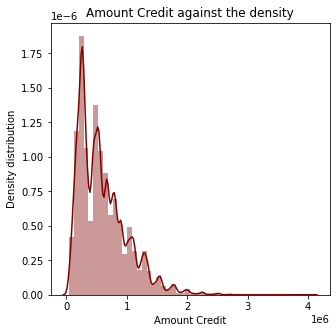

In [20]:
plt.figure(figsize = (5, 5))
sns.distplot(application_train.AMT_CREDIT, color = 'maroon')
plt.xlabel('Amount Credit');
plt.ylabel('Density distribution');
plt.title('Amount Credit against the density');

plt.show()

### Section 3.2 : Plot based on Gender 

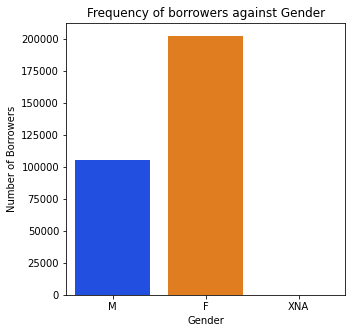

In [21]:
plt.figure(figsize = (5, 5))
sns.countplot(application_train.CODE_GENDER, palette=sns.color_palette('bright')[:2])
plt.xlabel('Gender');
plt.ylabel('Number of Borrowers');
plt.title('Frequency of borrowers against Gender');

plt.show()

### Section 3.3 : Plot based on Family Status

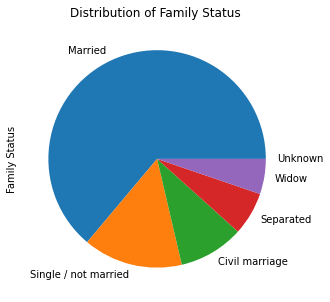

In [22]:
plt.figure(figsize = (5, 5))
application_train.NAME_FAMILY_STATUS.value_counts().plot(kind= "pie")
plt.title('Distribution of Family Status ');
plt.ylabel('Family Status');
plt.show()

### Section 3.4 : Missing count on Training Data ( in percentage)

In [23]:
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = application_train.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data=missing_application_train_data.reset_index().rename(columns={'index':'Attributes'})
missing_application_train_data

,Attributes,Percent,Train Missing Count
0,COMMONAREA_MEDI,69.87,214865
1,COMMONAREA_AVG,69.87,214865
2,COMMONAREA_MODE,69.87,214865
3,NONLIVINGAPARTMENTS_MODE,69.43,213514
4,NONLIVINGAPARTMENTS_AVG,69.43,213514
...,...,...,...
117,NAME_HOUSING_TYPE,0.00,0
118,NAME_FAMILY_STATUS,0.00,0
119,NAME_EDUCATION_TYPE,0.00,0
120,NAME_INCOME_TYPE,0.00,0


### Section 3.5 : Plot based on Missing values

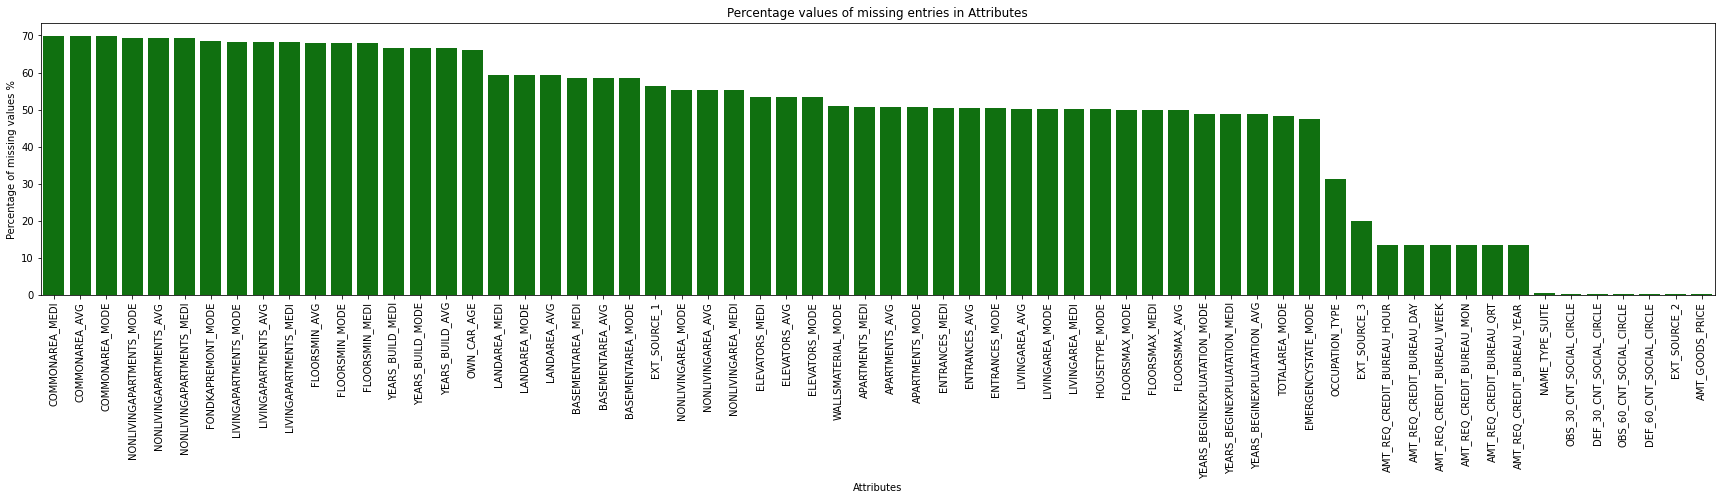

In [24]:
plt.figure(figsize = (30, 5))
sns.barplot(x='Attributes',y='Percent',data=missing_application_train_data[missing_application_train_data.Percent>0], palette = ['green'])
plt.xlabel('Attributes');
plt.ylabel('Percentage of missing values %');
plt.title('Percentage values of missing entries in Attributes');
plt.xticks(rotation=90);
plt.show()

### Section 3.6 : Test missing count on Testing Data( in percentage)

In [25]:
percent = (application_test.isnull().sum()/application_test.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing =application_test.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
...,...,...
NAME_HOUSING_TYPE,0.00,0
NAME_FAMILY_STATUS,0.00,0
NAME_EDUCATION_TYPE,0.00,0
NAME_INCOME_TYPE,0.00,0


### Section 3.7 : Plot based on Target 

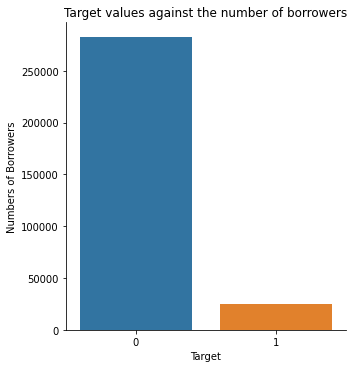

In [26]:
sns.catplot(data = application_train, x='TARGET', kind = 'count')
plt.xlabel('Target');
plt.ylabel('Numbers of Borrowers');
plt.title('Target values against the number of borrowers');
plt.show()

### Section 3.8 : Target Correlation 

In [27]:
corr_application_train = application_train.corr()['TARGET'].sort_values()
corr_application_train = corr_application_train.reset_index().rename(columns={'index':'Attributes','TARGET':'Correlation'})
corr_application_train

,Attributes,Correlation
0,EXT_SOURCE_3,-0.178919
1,EXT_SOURCE_2,-0.160472
2,EXT_SOURCE_1,-0.155317
3,DAYS_EMPLOYED,-0.044932
4,FLOORSMAX_AVG,-0.044003
...,...,...
101,DAYS_LAST_PHONE_CHANGE,0.055218
102,REGION_RATING_CLIENT,0.058899
103,REGION_RATING_CLIENT_W_CITY,0.060893
104,DAYS_BIRTH,0.078239


In [28]:
correlations = application_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


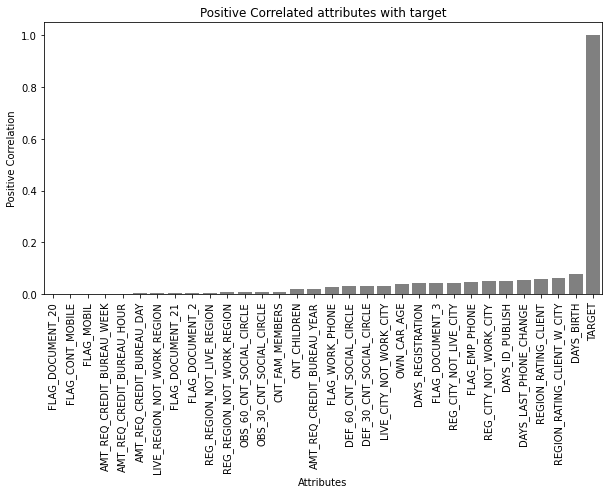

In [29]:
plt.figure(figsize = (10, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_application_train[corr_application_train.Correlation>0], palette = ['grey'])
plt.xlabel('Attributes');
plt.ylabel('Positive Correlation');
plt.title('Positive Correlated attributes with target');
plt.xticks(rotation=90);
plt.show()

The above graph depicts the column features which are Positively correlated based on target.

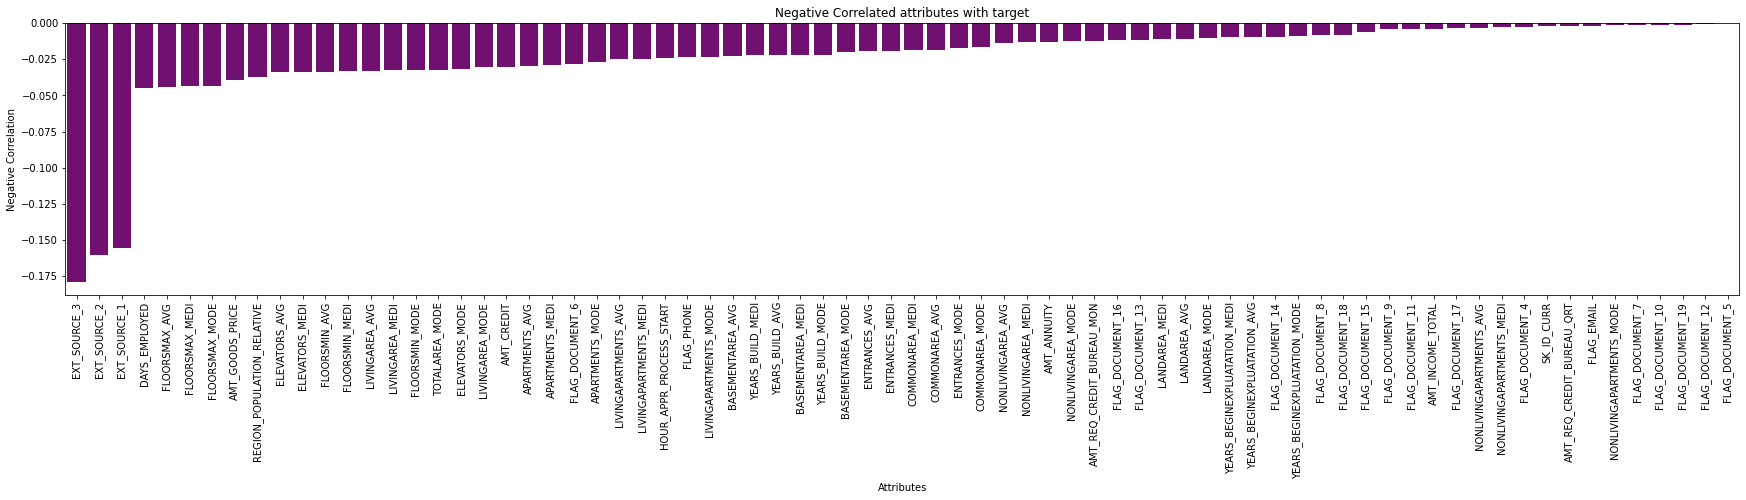

In [30]:
plt.figure(figsize = (30, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_application_train[corr_application_train.Correlation<=0], palette = ['purple'])
plt.xlabel('Attributes');
plt.ylabel('Negative Correlation');
plt.title('Negative Correlated attributes with target');
plt.xticks(rotation=90);
plt.show()

The above graph depicts the column features which are Negatively correlated based on target.

### Section 3.9 : Count of clients based on age

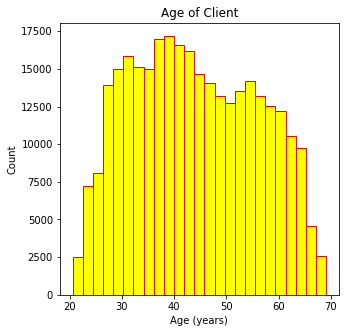

In [31]:
plt.figure(figsize = (5, 5))
plt.hist(application_train.DAYS_BIRTH / -365, edgecolor = 'red', bins = 25, color = 'yellow')
plt.title('Age of Client'); 
plt.xlabel('Age (years)'); 
plt.ylabel('Count');

### Section 3.10 : Count of applicants based on occupation type

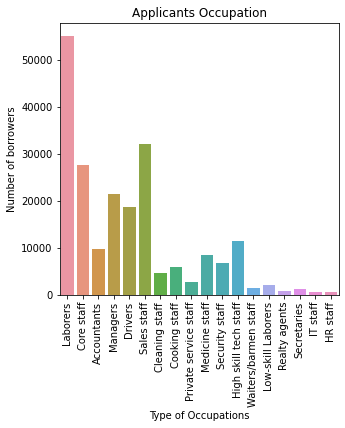

In [32]:
plt.figure(figsize = (5, 5))
sns.countplot(x='OCCUPATION_TYPE', data=application_train);
plt.title('Applicants Occupation');
plt.xlabel('Type of Occupations'); 
plt.ylabel('Number of borrowers');
plt.xticks(rotation=90);

### Section 3.11 : Exploration of amount credit

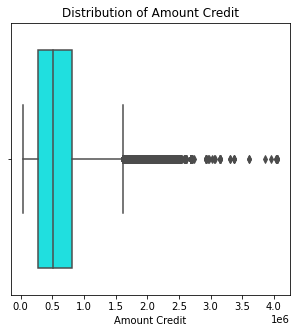

In [33]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = application_train, x = 'AMT_CREDIT', color = 'cyan')
plt.xlabel('Amount Credit'); 
plt.title('Distribution of Amount Credit');
plt.show()

### Section 3.13 : Exploration of Income total

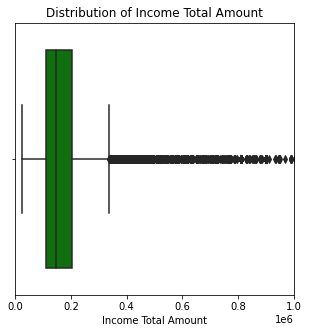

In [34]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = application_train, x = 'AMT_INCOME_TOTAL', color = 'green')
plt.xlim(0,1000000)
plt.xlabel('Income Total Amount'); 
plt.title('Distribution of Income Total Amount');
plt.show()

### Section 3.14 : Target vs borrowers based on their childrens

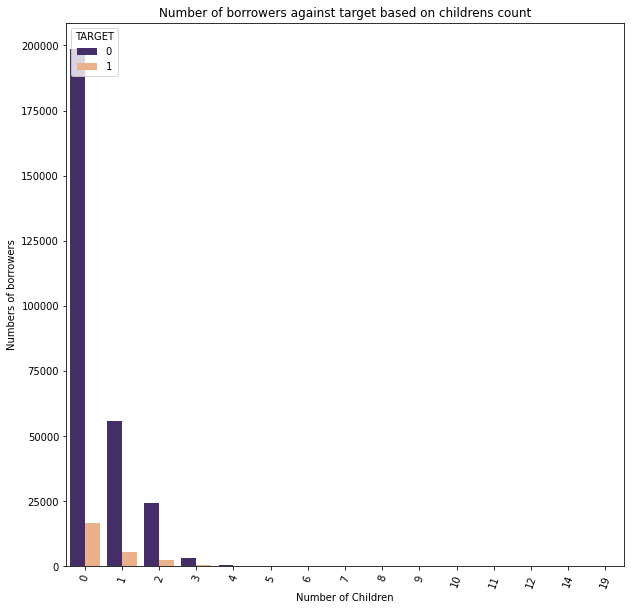

In [35]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(x='CNT_CHILDREN', hue = 'TARGET',data=application_train, palette=['#432371',"#FAAE7B"])
plt.xlabel("Number of Children")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on childrens count');
plt.xticks(rotation=70)
plt.show()

It is observed that people with no children have a difficult time of paying their borrowed loan. It is also observed that as the number of children increase, the number of defaulters reduce.

### Section 3.15 : Exploration of borrowers based on their education type

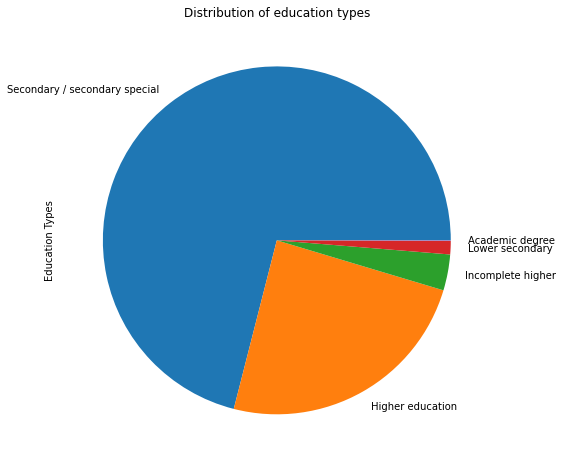

In [36]:
plt.figure(figsize = (8, 8))
application_train.NAME_EDUCATION_TYPE.value_counts().plot(kind= "pie")
plt.ylabel('Education Types')
plt.title('Distribution of education types');
plt.show()

In [37]:
Education_type1 = application_train[application_train.NAME_EDUCATION_TYPE=='Higher education']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})

Education_type1['NAME_EDUCATION_TYPE'] = 'Higher education'
Education_type2 = application_train[application_train.NAME_EDUCATION_TYPE=='Academic degree']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Education_type2['NAME_EDUCATION_TYPE'] = 'Academic degree'
Education_type3 = application_train[application_train.NAME_EDUCATION_TYPE=='Lower secondary']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Education_type3['NAME_EDUCATION_TYPE'] = 'Lower secondary'
Education_type4 = application_train[application_train.NAME_EDUCATION_TYPE=='Incomplete higher']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Education_type4['NAME_EDUCATION_TYPE'] = 'Incomplete higher'
Education_type5 = application_train[application_train.NAME_EDUCATION_TYPE=='Secondary / secondary special']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Education_type5['NAME_EDUCATION_TYPE'] = 'Secondary / secondary special'

EducationTypes = Education_type1.append(Education_type2, ignore_index=True,sort=False)
EducationTypes = EducationTypes.append(Education_type3, ignore_index=True,sort=False)
EducationTypes = EducationTypes.append(Education_type4, ignore_index=True,sort=False)
EducationTypes = EducationTypes.append(Education_type5, ignore_index=True,sort=False)
EducationTypes

,TARGET,Borrowers_count,NAME_EDUCATION_TYPE
0,0,70854,Higher education
1,1,4009,Higher education
2,0,161,Academic degree
3,1,3,Academic degree
4,0,3399,Lower secondary
5,1,417,Lower secondary
6,0,9405,Incomplete higher
7,1,872,Incomplete higher
8,0,198867,Secondary / secondary special
9,1,19524,Secondary / secondary special


### Section 3.16 : Target vs borrowers based on education type

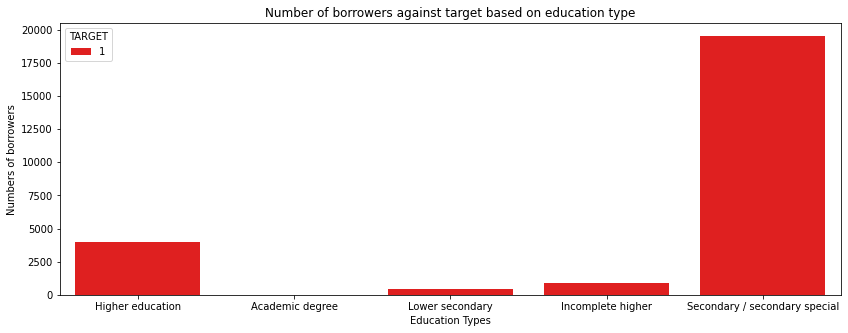

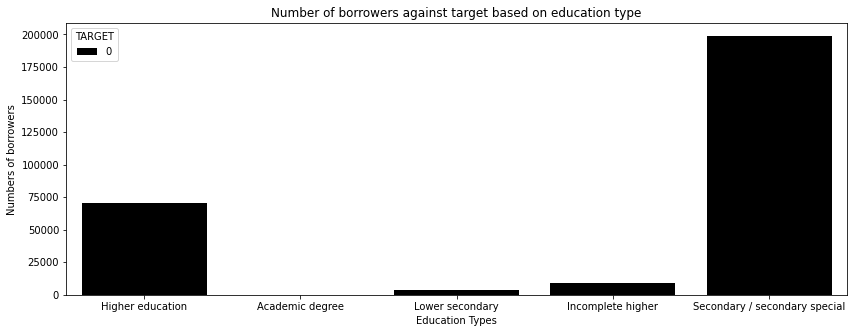

In [38]:
plt.figure(figsize = (14, 5))
sns.barplot(x='NAME_EDUCATION_TYPE',y='Borrowers_count',hue = 'TARGET',data=EducationTypes[EducationTypes['TARGET']==1], palette = ['red'])
plt.xlabel("Education Types")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on education type');
plt.show()

plt.figure(figsize = (14, 5))
sns.barplot(x='NAME_EDUCATION_TYPE',y='Borrowers_count',hue = 'TARGET',data=EducationTypes[EducationTypes['TARGET']==0], palette = ['black'])
plt.xlabel("Education Types")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on education type');
plt.show()

It is observed that people with Secondary/ Secondary degree are usually the defaulters followed by Higher education degree holders.

### Section 3.17 : Target vs borrowers based on gender 

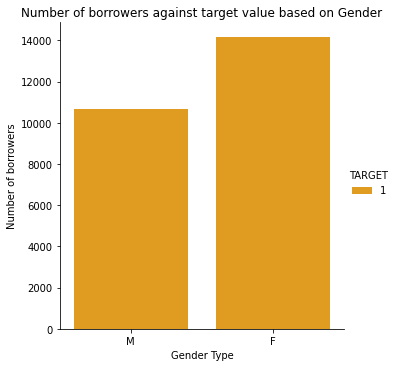

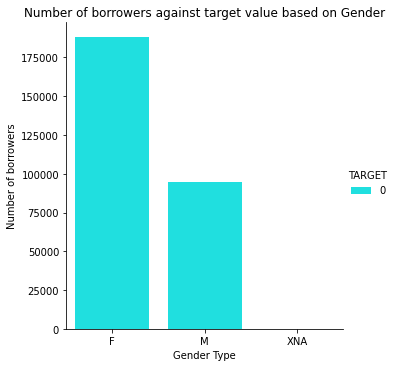

In [39]:
sns.catplot(data=application_train[application_train.TARGET==1],x='CODE_GENDER',kind='count',hue="TARGET",palette = ['orange']);
plt.xlabel('Gender Type');
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Gender');

sns.catplot(data=application_train[application_train.TARGET==0],x='CODE_GENDER',kind='count',hue="TARGET",palette = ['cyan']);
plt.xlabel('Gender Type');
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Gender');
plt.show()

It is observed that the more number of females are the defaulters but it is also observed that there is high difference between number of males and females during sampling. Hence, Based on the given data females are more defaulters.

### Section 3.18 : Target vs borrowers based on family status 

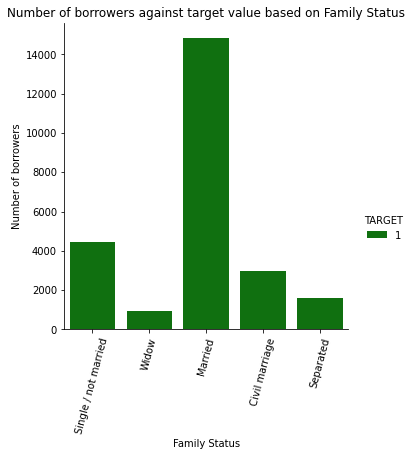

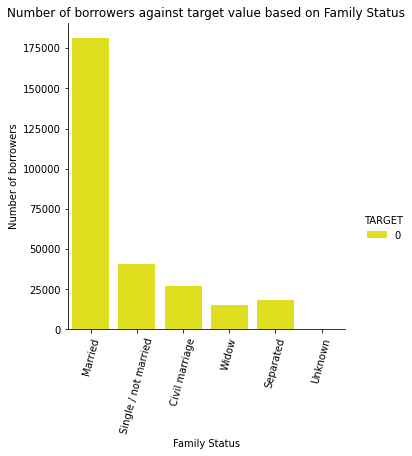

In [40]:
sns.catplot(data=application_train[application_train.TARGET==1],x='NAME_FAMILY_STATUS',kind='count',hue="TARGET",palette = ['green']);
plt.xlabel('Family Status');
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Family Status');
plt.xticks(rotation=75);

sns.catplot(data=application_train[application_train.TARGET==0],x='NAME_FAMILY_STATUS',kind='count',hue="TARGET", palette = ['yellow']);
plt.xlabel('Family Status');
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Family Status');
plt.xticks(rotation=75);
plt.show()

It is observed that the more number of married are the defaulters but it is also observed that there is high difference between number of married samples and the other types . Hence, Based on the given data married people are more defaulters.

### Section 3.19 : Target vs borrowers based on income types

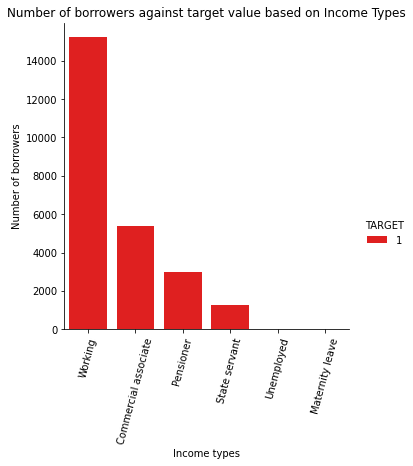

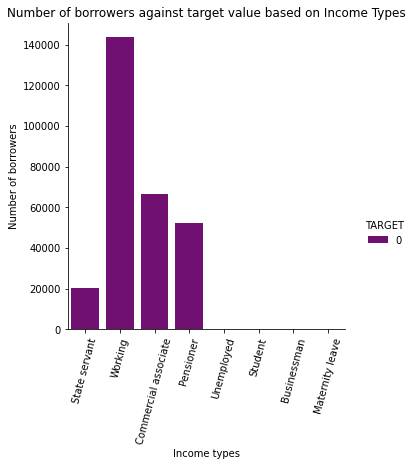

In [41]:
sns.catplot(data=application_train[application_train.TARGET==1],x='NAME_INCOME_TYPE',kind='count',hue="TARGET", palette = ['red']);
plt.xlabel('Income types');
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Income Types');
plt.xticks(rotation=75);

sns.catplot(data=application_train[application_train.TARGET==0],x='NAME_INCOME_TYPE',kind='count',hue="TARGET", palette = ['purple']);
plt.xlabel('Income types');
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Income Types');
plt.xticks(rotation=75);

### Section 3.20 : Target vs borrowers age group based on their failure rate to repay

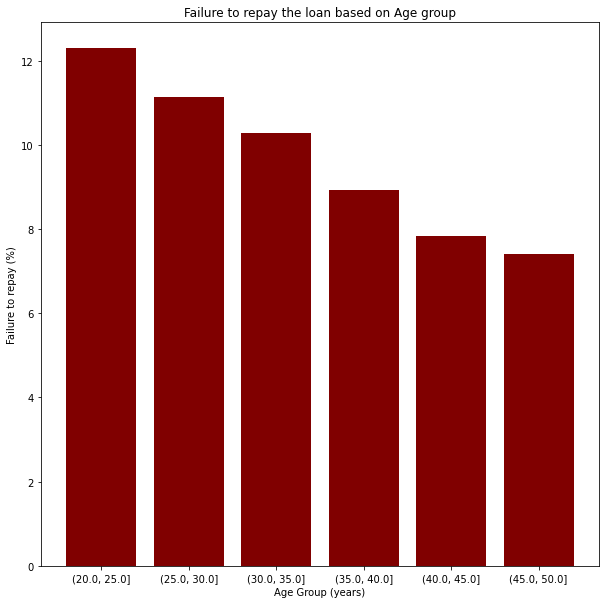

In [42]:
years=application_train[['TARGET','DAYS_BIRTH']]
years['YEARS_BIRTH']=years['DAYS_BIRTH']/-365
years['group']=pd.cut(years['YEARS_BIRTH'],bins=np.linspace(0,50,num=11))
age_groups = years.groupby('group').mean()
age_groups

plt.figure(figsize=(10,10))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'], color = 'Maroon')
plt.xlabel('Age Group (years)');
plt.ylabel('Failure to repay (%)')
plt.title('Failure to repay the loan based on Age group');
plt.show()


It is observed that the age group of  20 to 25 are more prone to failure to repay their loan.

### Section 3.21 : Target vs borrowers based on loan type

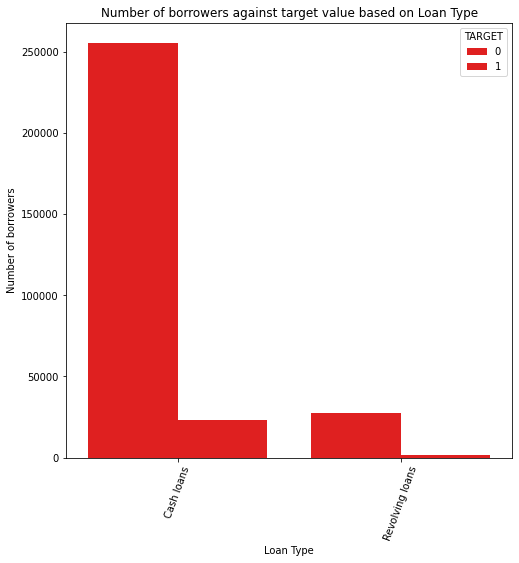

In [43]:
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(x='NAME_CONTRACT_TYPE', hue = 'TARGET',data=application_train, palette = ['red'])
plt.xlabel("Loan Type")
plt.ylabel('Number of borrowers')
plt.xticks(rotation=70)
plt.title('Number of borrowers against target value based on Loan Type');
plt.show()


It is observed that there are higher number of defaulters while taking cash loans while compared to revolving loans, but the number of samples on Cash Loans is much higher compared to revolving loans.

### Section 3.22 : Housing type of borrowers

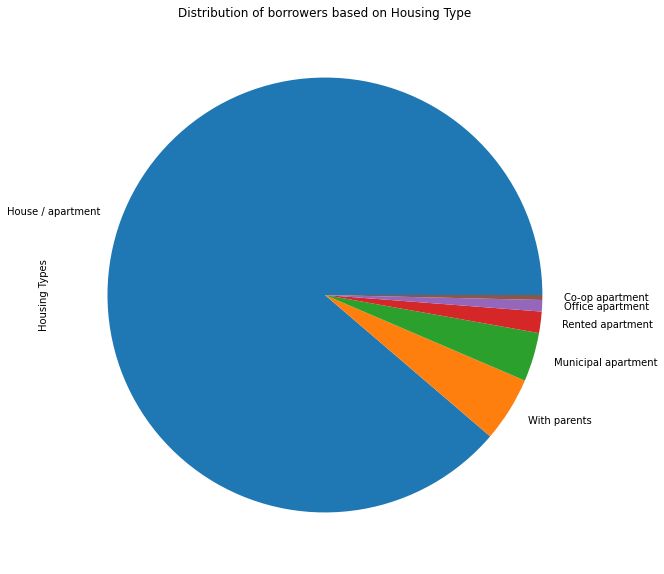

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
application_train.NAME_HOUSING_TYPE.value_counts().plot(kind= "pie")
plt.ylabel('Housing Types')
plt.title('Distribution of borrowers based on Housing Type');
plt.show()

### Section 3.23 : Target vs borrowers based on housing type

In [45]:
Housing_type1 = application_train[application_train.NAME_HOUSING_TYPE=='Co-op apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type1['NAME_HOUSING_TYPE'] = 'Co-op apartment'
Housing_type2 = application_train[application_train.NAME_HOUSING_TYPE=='Office apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type2['NAME_HOUSING_TYPE'] = 'Office apartment'
Housing_type3 = application_train[application_train.NAME_HOUSING_TYPE=='Rented apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type3['NAME_HOUSING_TYPE'] = 'Rented apartment'
Housing_type4 = application_train[application_train.NAME_HOUSING_TYPE=='Municipal apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type4['NAME_HOUSING_TYPE'] = 'Municipal apartment'
Housing_type5 = application_train[application_train.NAME_HOUSING_TYPE=='With parents']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type5['NAME_HOUSING_TYPE'] = 'With parents'
Housing_type6 = application_train[application_train.NAME_HOUSING_TYPE=='House / apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type6['NAME_HOUSING_TYPE'] = 'House / apartment'

HousingTypes = Housing_type1.append(Housing_type2, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type3, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type4, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type5, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type6, ignore_index=True,sort=False)
HousingTypes

,TARGET,Borrowers_count,NAME_HOUSING_TYPE
0,0,1033,Co-op apartment
1,1,89,Co-op apartment
2,0,2445,Office apartment
3,1,172,Office apartment
4,0,4280,Rented apartment
5,1,601,Rented apartment
6,0,10228,Municipal apartment
7,1,955,Municipal apartment
8,0,13104,With parents
9,1,1736,With parents


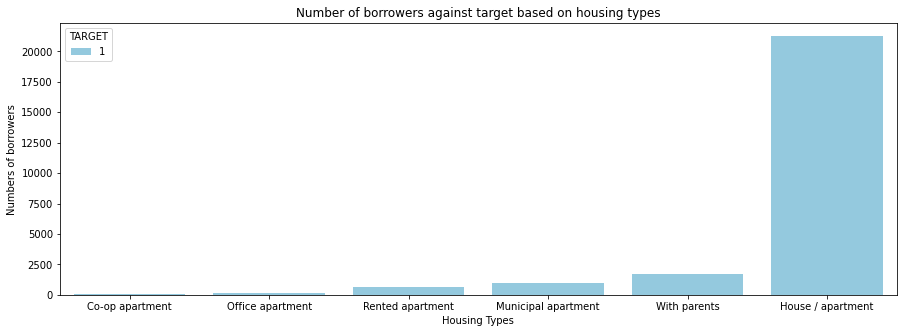

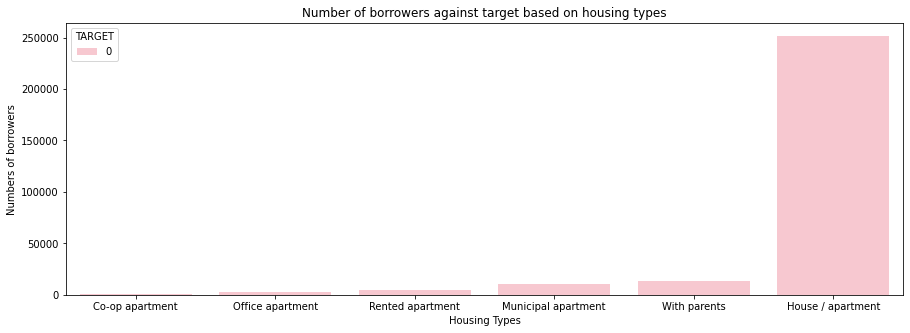

In [46]:
plt.figure(figsize = (15, 5))
sns.barplot(x='NAME_HOUSING_TYPE',y='Borrowers_count',hue = 'TARGET',data=HousingTypes[HousingTypes['TARGET']==1], palette = ['skyblue'])
plt.xlabel("Housing Types")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on housing types');
plt.show()

plt.figure(figsize = (15, 5))
sns.barplot(x='NAME_HOUSING_TYPE',y='Borrowers_count',hue = 'TARGET',data=HousingTypes[HousingTypes['TARGET']==0], palette = ['pink'] )
plt.xlabel("Housing Types")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on housing types');
plt.show()

It is observed that the people with House/Apartment fails to repay their borrowed loan.

### Section 3.24 : Borrowers loan type based on occupation

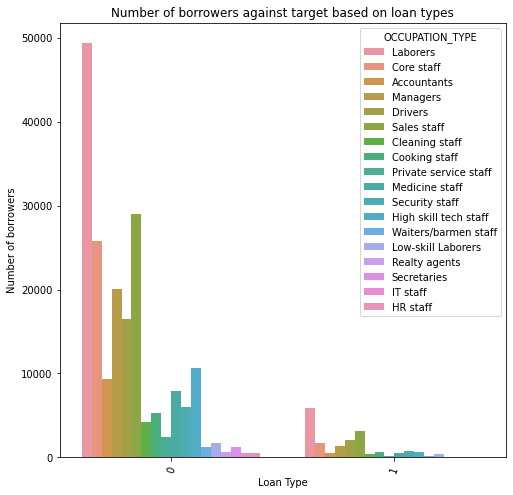

In [47]:
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(x='TARGET', hue = 'OCCUPATION_TYPE',data=application_train)
plt.xlabel("Loan Type")
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target based on loan types');
plt.xticks(rotation=70)
plt.show()

The above graph depicts the multiple kinds of occupation types and what type of loan (Cash loan/revolving loan) they have taken.

### Section 3.25 : Target vs borrowers based on income and credit ( in ratio )

In [48]:
Income_credit = application_train[['AMT_INCOME_TOTAL','AMT_CREDIT','TARGET']]
Income_credit['Ratio'] = (Income_credit['AMT_INCOME_TOTAL']/Income_credit['AMT_CREDIT'])
Income_credit

,AMT_INCOME_TOTAL,AMT_CREDIT,TARGET,Ratio
0,202500.0,406597.5,1,0.498036
1,270000.0,1293502.5,0,0.208736
2,67500.0,135000.0,0,0.500000
3,135000.0,312682.5,0,0.431748
4,121500.0,513000.0,0,0.236842
...,...,...,...,...
307506,157500.0,254700.0,0,0.618375
307507,72000.0,269550.0,0,0.267112
307508,153000.0,677664.0,0,0.225776
307509,171000.0,370107.0,1,0.462029


### Section 3.26 : Count of borrowers based on income credit ( in ratio )

In [49]:
import numpy as np
def count_bins(df):
    count_dict={}
    for i in range(len(df)):
        
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.1 and df["Ratio"].iloc[i]>=0):
            if(0 in count_dict):
                count_dict[0]+=1
            else:
                count_dict[0]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.2 and df["Ratio"].iloc[i]>=0.1):
            if(0 in count_dict):
                count_dict[1]+=1
            else:
                count_dict[1]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.3 and df["Ratio"].iloc[i]>=0.2):
            if(0 in count_dict):
                count_dict[2]+=1
            else:
                count_dict[2]=1
                
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.4 and df["Ratio"].iloc[i]>=0.3):
            if(0 in count_dict):
                count_dict[3]+=1
            else:
                count_dict[3]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.5 and df["Ratio"].iloc[i]>=0.4):
            if(0 in count_dict):
                count_dict[4]+=1
            else:
                count_dict[4]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.6 and df["Ratio"].iloc[i]>=0.5):
            if(0 in count_dict):
                count_dict[5]+=1
            else:
                count_dict[5]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.7 and df["Ratio"].iloc[i]>=0.6):
            if(0 in count_dict):
                count_dict[6]+=1
            else:
                count_dict[6]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.8 and df["Ratio"].iloc[i]>=0.7):
            if(0 in count_dict):
                count_dict[7]+=1
            else:
                count_dict[7]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.9 and df["Ratio"].iloc[i]>=0.8):
            if(0 in count_dict):
                count_dict[8]+=1
            else:
                count_dict[8]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<=1.0 and df["Ratio"].iloc[i]>=0.9):
            if(0 in count_dict):
                count_dict[9]+=1
            else:
                count_dict[9]=1
    return count_dict
        
        
    

In [50]:
ff = count_bins(Income_credit)

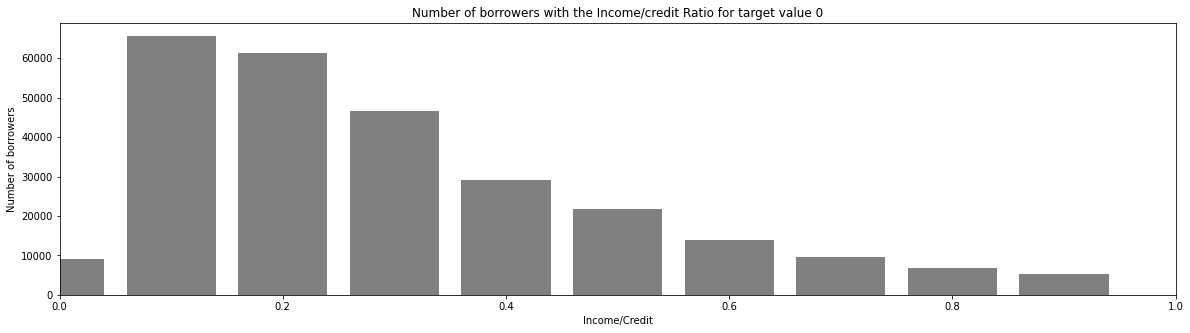

In [51]:
ratios = list(ff.keys())
count = list(ff.values())
AMT_INCOME_TOTAL_AMT_CREDIT = []
for i in ratios:
    AMT_INCOME_TOTAL_AMT_CREDIT.append(i / 10)
fig = plt.figure(figsize = (20, 5))
 
plt.bar(AMT_INCOME_TOTAL_AMT_CREDIT, count, color ='grey',width=0.08)
plt.xlim(0,1,0.1)
plt.xlabel("Income/Credit")
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers with the Income/credit Ratio for target value 0');
plt.show()



It is observed that the income of the borrower is 10% of their income in most of the samples.

## Section 4 : Baseline Model

In [59]:
application_train
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
application_train = pd.read_csv('application_train.csv')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score, log_loss, accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

numerical_columns = []
categorical_columns = []
X =  application_train.drop(columns = 'TARGET')
y = application_train['TARGET']
for x in X:
    if(X[x].dtype == np.float64 or X[x].dtype == np.int64):
        numerical_columns.append(X[x])
    else:
        categorical_columns.append(X[x])

# In the above snippet,We take two lists and add the categorical attributes into the categorical lists and numerical attributes in the numerical lists
numerical_pl =Pipeline([('scaler', StandardScaler()),
('imputer', SimpleImputer(strategy = 'mean'))])
categorical_pl = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent'))
])
combined_pipeline = FeatureUnion(transformer_list=[ ("numerical_pl", numerical_pl), ("categorical_pl", categorical_pl),
])
np.random.seed(42) 
combined_pl_with_pred = Pipeline([
            ("preparation", numerical_pl),
("linear", LogisticRegression(random_state=42))])

# We then take two pipelines, One for numerical and one for categorical. And combine them using FeatureUnion
def EncodingDataset(application_train):
    categorical_columns = list(application_train.select_dtypes(include=['category','object']))
    enc = LabelEncoder()

    for column in categorical_columns:
        try:
            application_train[column] = application_train[column].fillna("NULL")
            application_train[column] = enc.fit_transform(application_train[column])
        except:
            print('Cannot convert :',column)
    return application_train
#Since, there are categorical attributes, we encode the dataset using LabelEncoding
application_train = EncodingDataset(application_train)
application_test = EncodingDataset(application_test)
#The following code is to train the model and predict the accuracy.
X =  application_train.drop(columns = 'TARGET')
y = application_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(X_test.mean())
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())
combined_pl_with_pred.fit(X_train, y_train)
preds_test = combined_pl_with_pred.predict(X_test)
preds_train = combined_pl_with_pred.predict(X_train)
train_score = combined_pl_with_pred.score(X_train, y_train)
test_score  = combined_pl_with_pred.score(X_test, y_test)

AUC = roc_auc_score(y_test,combined_pl_with_pred.predict(X_test))

ConfusionMatrix = confusion_matrix(y_test, combined_pl_with_pred.predict(X_test))
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)
print(accuracy_score(y_test, preds_test), ": is the accuracy score")
print("The training score is: ",train_score)
print("The testing score is: ",test_score)
print("The Area Under the Curve: ",AUC)
print("The Confusion Matrix is: ",ConfusionMatrix)


train size X :  (246008, 121)
train size y :  (246008,)
test size X :  (61503, 121)
test size y :  (61503,)
0.91910963692828 : is the accuracy score
The training score is:  0.9190310884198888
The testing score is:  0.91910963692828
The Area Under the Curve:  0.5039186543640561
The Confusion Matrix is:  [[56483    71]
 [ 4904    45]]


### Section 4.1 : Balancing Data and Training the Baseline Model-1

In [53]:
balanced_data = application_train[application_train['TARGET']==1]
balanced_data = balanced_data.append(application_train[application_train['TARGET']==0].reset_index(drop=True).sample(n = 25000))
print(balanced_data.shape)
balanced_data.head()
x = balanced_data.drop(columns='TARGET')
y = balanced_data['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True, random_state=42)
print(x_train.shape,y_train.shape)
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(X_test.mean())
x_test = x_test.fillna(x_test.mean())
y_test = y_test.fillna(y_test.mean())
combined_pl_with_pred.fit(x_train, y_train)
preds_test = combined_pl_with_pred.predict(x_test)
preds_train = combined_pl_with_pred.predict(x_train)
train_score = combined_pl_with_pred.score(x_train, y_train)
test_score  = combined_pl_with_pred.score(x_test, y_test)

AUC = roc_auc_score(y_test,combined_pl_with_pred.predict(x_test))

ConfusionMatrix = confusion_matrix(y_test, combined_pl_with_pred.predict(x_test))
print("train size X : ",x_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",x_test.shape)
print("test size y : ",y_test.shape)
print(accuracy_score(y_test, preds_test), ": is the accuracy score")
print("The training score is: ",train_score)
print("The testing score is: ",test_score)
print("The Area Under the Curve: ",AUC)
print("The Confusion Matrix is: ",ConfusionMatrix)


(49825, 122)
(39860, 121) (39860,)
train size X :  (39860, 121)
train size y :  (39860,)
test size X :  (9965, 121)
test size y :  (9965,)
0.6873055694932263 : is the accuracy score
The training score is:  0.683843452082288
The testing score is:  0.6873055694932263
The Area Under the Curve:  0.6872928184362408
The Confusion Matrix is:  [[3454 1550]
 [1566 3395]]


### Section 4.2 : Balancing Data and Training the Baseline Model-2

In [61]:
balanced_data = application_train[application_train['TARGET']==1]
balanced_data = balanced_data.append(application_train[application_train['TARGET']==0].reset_index(drop=True).sample(n = 80000))
print(balanced_data.shape)
balanced_data.head()
x = balanced_data.drop(columns='TARGET')
y = balanced_data['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True, random_state=42)
print(x_train.shape,y_train.shape)
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(X_test.mean())
x_test = x_test.fillna(x_test.mean())
y_test = y_test.fillna(y_test.mean())
combined_pl_with_pred.fit(x_train, y_train)
preds_test = combined_pl_with_pred.predict(x_test)
preds_train = combined_pl_with_pred.predict(x_train)
train_score = combined_pl_with_pred.score(x_train, y_train)
test_score  = combined_pl_with_pred.score(x_test, y_test)

AUC = roc_auc_score(y_test,combined_pl_with_pred.predict(x_test))

ConfusionMatrix = confusion_matrix(y_test, combined_pl_with_pred.predict(x_test))
print("train size X : ",x_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",x_test.shape)
print("test size y : ",y_test.shape)
print(accuracy_score(y_test, preds_test), ": is the accuracy score")
print("The training score is: ",train_score)
print("The testing score is: ",test_score)
print("The Area Under the Curve: ",AUC)
print("The Confusion Matrix is: ",ConfusionMatrix)

(104825, 122)
(83860, 121) (83860,)
train size X :  (83860, 121)
train size y :  (83860,)
test size X :  (20965, 121)
test size y :  (20965,)
0.7752921535893156 : is the accuracy score
The training score is:  0.7807059384688767
The testing score is:  0.7752921535893156
The Area Under the Curve:  0.5764405114811659
The Confusion Matrix is:  [[15270   714]
 [ 3997   984]]


## Section 5 : Abstract

Many people struggle to get loans due to insufficient or non-existent credit histories. Unfortunately, this population is often taken advantage of by untrustworthy lenders. Home credit strives to broaden financial intrusion for the unbanked population by providing a positive and safe borrowing experience.  In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. There are multiple  datasets that will be taken from Kaggle that are mentioned in the below section. We perform exploratory data analysis and feature engineering on the given datasets and train the data using multiple classification algorithms. Based on some specific metrics, we decide which model is the best among all. The output of the model will be either 0 or 1 where 0 corresponds to saying that the customer will repay the loan and 1 meaning that there’s some risk to the customer repaying to the lender.
In phase 1, we provide baseline logistic regression pipelines. 
We experimented with a baseline pipelines, 25000 Non-Defaulters balanced dataset, 80000 Non-Defaulters balanced dataset. The logistic regression baseline pipeline had a high accuracy of 91.9% and an Area Under the Curve score of 0.5039
Since, the dataset was unbalanced, we took a balanced dataset of 25000 Non-Defaulters for which we got a pretty low accuracy of 68.6% and got a high Area Under the Curve score of 0.68.
Next, We took a balanced dataset of 80000 Non-Defaulters for which we got a pretty low accuracy of 77.4% and got a Area Under the Curve score of 0.577.


## Section 6 : Data Description and Task Description

### Section 6.1 : Dataset 

Application_train/application_test: This dataset contains information about each loan application at Home Credit. Each loan is depicted by a row and is identified by the feature SK_ID_CURR. The training application comes with target indicating 0 which means the loan was repaid and 1 the loan was not repaid.  

Bureau: Data concerning client’s previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan can have multiple previous credits. 

Bureau_balance: Monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length 

Previous_Application: Previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV. 

POS_CASH_BALANCE: Monthly data about previous point of sale or cash loans client have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows. 

Credit_Card_Balance: Monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows. 
Installments_payment: Payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 

Installments_payment: Payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 


### Section 6.2 : Training Dataset (application_train.csv):
The below is the first training dataset: 

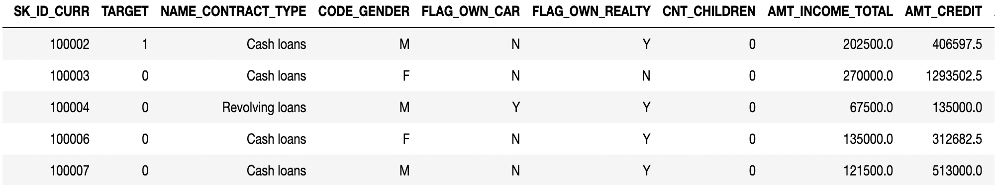

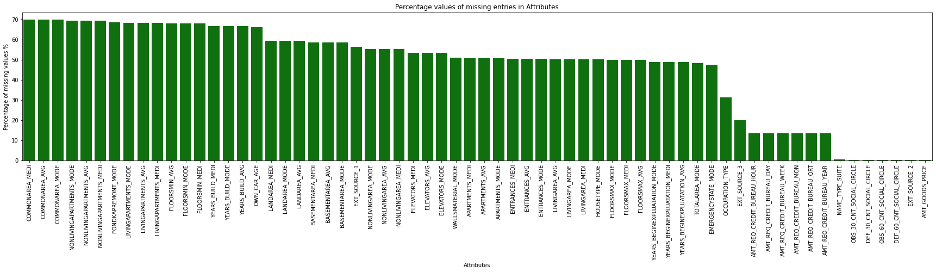

The above figure 1 gives us the Null Count of each feature of the training data set.
So for the Null Values, We replace them with the Mean.

### Section 6.3 : Diagram of Workflow :

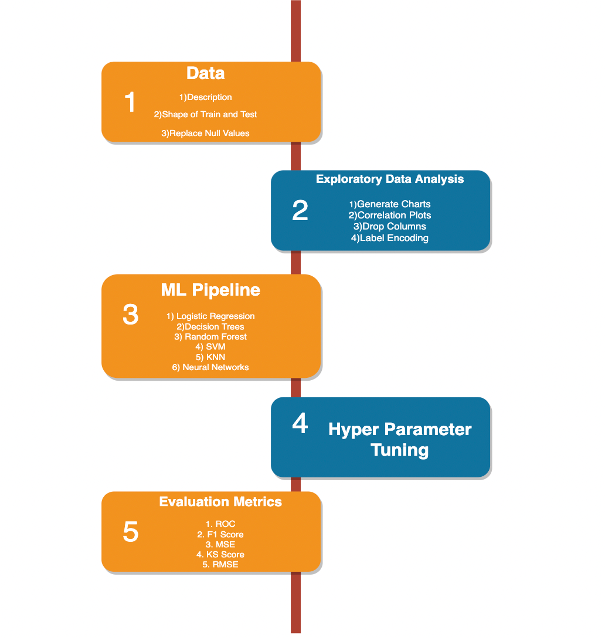



### Section 7 : Exploratory Data Analysis

Descriptive statistics :
1) A data dictionary of the raw features:
	 i)Pandas profiling in jupyter notebook 
2) We did descriptive analysis on the dataset such as data type of each feature, dataset size (rows and columns = 307511, 122), and summary statistics such as the number of observations, mean, standard deviation, maximum, minimum, and quartiles for all features.
3) We generated charts on descriptive statistics of the target dataset. 


For the exploratory analysis, please refer to the Section 3 of this notebook

## Section 8 : Modeling Pipelines

### Section 8.1 : Machine Learning 

Machine Learning Algorithm:

We plan on implementing Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, K- Nearest Neighbors, Neural Networks (Recurrent Neural Networks and Multilayer perceptron) as our model classifiers.  
The output of the models would be either “Risk Free” and “Defaulter”. The output of the classification model would be 0 or 1 where 0 corresponds to “Risk Free” and 1 corresponds to “Defaulter”. Logistic Regression is a process of modeling the probability of a discrete outcome given an input variable. Decision Trees are non-parametric supervised learning method used for classification and regression and a combination of decision trees is a Random Forest. Support Vector Machines is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes. KNN is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbors to a new unknown variable that must be predicted or classified is denoted by the symbol 'K'. A recurrent neural network is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. 
A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. And while in the Perceptron the neuron must have an activation function that imposes
a threshold, like ReLU or sigmoid, neurons in a Multilayer Perceptron can use any arbitrary activation function.

The metrics used for measuring the accuracy and performance of our models are ROC, F1 Score, MSE, KS Score, RMSE. 

The first step would be gathering datasets from Kaggle. Then, we do exploratory analysis and perform feature engineering. After this, we use this data and train using multiple classification models like Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, K-Nearest Neighbors, and Neural Networks. We check the output of each model using evaluation metrics like F1-score, MSE, RMSE, KS Score, ROC AUC and decide on which algorithm, we’re getting the best accuracy. It is important we do this carefully as we need to make sure the worthy people are sanctioned loans and unworthy ones are rejected.


### Section 8.2 : Baseline Linear Regression Pipeline

First, as we learned in class, we split train and test data. We split 20% test data with random seed set to 42 for correct results
Next, we built a logistic regression baseline pipeline. We build a numerical pipeline based on numerical attributes and standard scaler. We impute the missing values using mean. We do a logistic regression with this numeric pipeline.
We compute test accuracy and AUC using this model.

#### Section 8.2.1 : Results on Logistic Regression

Section 4 reports the test accuracy and AUC Score of logistic regression baseline. The AUC Score is 0.5039 and a testing accuracy of 91.9%

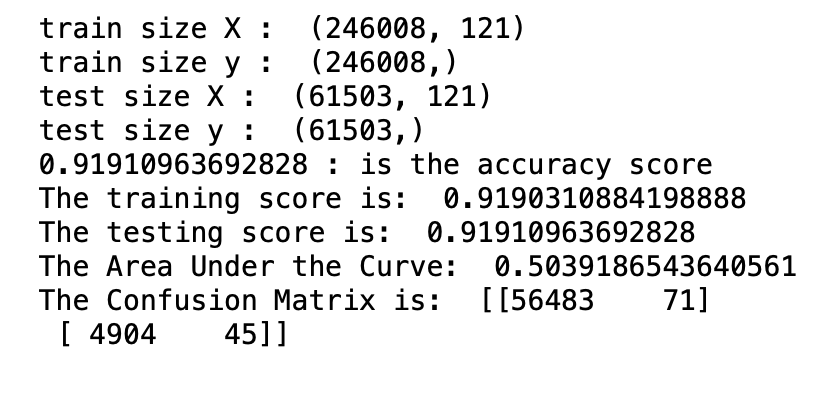

#### Section 8.2.2 : Results on Logistic Regression on Baseline Model -1  

1) Since the dataset is unbalanced, we balance it by building a Non-Defaulters Dataset. We do this to improve the Area Under the Curve score.
2) We split the dataset into testing and training dataset where testing = 20% of the full dataset.
3) We take 25000 Non-Defaulters dataset initially and train the model with this dataset.
4) The results are as in Section 4.1, The Area Under the Score increased to 0.68 but the accuracy of the model fell considerably down to 68%.

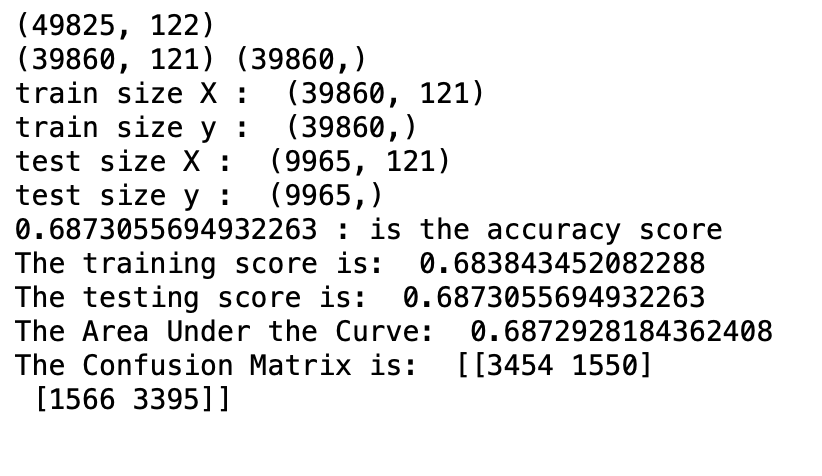

#### Section 8.2.3 : Results on Logistic Regression on Baseline Model - 2

In the second model, we take a dataset with 80000 Non-Defaulters and train the model with this dataset. The results are as in Section 4.2, The Area Under the Score came out to be 0.57 and the accuracy of the model is still poor with an accuracy of 77.5%

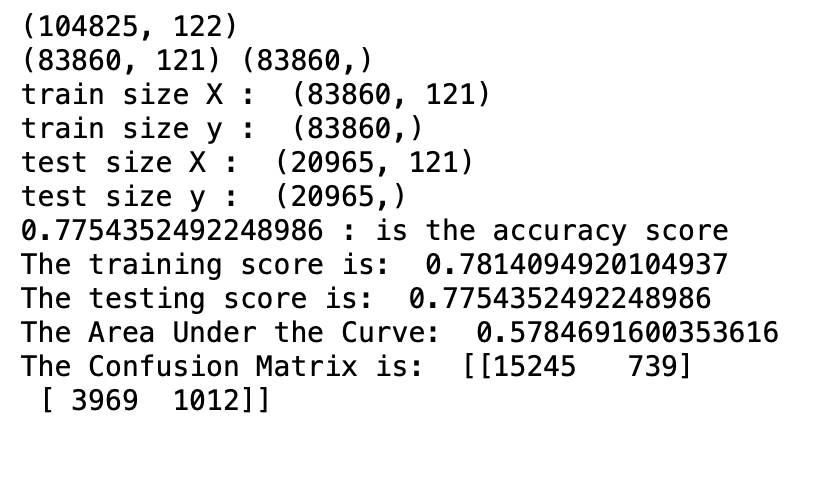

## Section 9 : Additional Results and Discussions

In Section 8.2.1, 8.2.2, and 8.2.3, it reports the accuracy and Area Under the Curve score of the model. In 8.2.1, we split the numerical and categorical attributes into different pipelines and perform Feature Union on those pipelines and train it using Linear Regression by splitting the training and testing data in 80% and 20% ratio respectively. After training we test the model using Area Under the Curve metric and testing the model. The AUC score came out to be 0.5039 and the model score is 91.9%.
We got a decent accuracy score but the AUC score is pretty, this is due to the reason that the dataset is imbalanced.
Since the dataset is imbalanced, we try to balance the dataset by down sampling the dataset and taking only 25000 Non-Defaulters initially. We then train this model using Logistic Regression again and apply the same metrics. The AUC score came out to be 0.68 and the model score is 0.68. We got a good AUC score but at the expense of a bad accuracy which is not acceptable.
Now, we try to take a higher sample with 80000 Non-Defaulters dataset. We follow the same process on this dataset as well. The AUC score came out to be 0.57 and the model score is 0.77. The AUC score decreased and the improves the accuracy as well. But the scores aren't satisfying. 


## Section 10 : Conclusions

The object of the HCDR project is to foresee the repayment capacity of the financially under-served populace. This project is important because well-established predictions are necessary to both the loaner and borrower. HomeCredit will need accuracy of the highest level to make sure the data is predicted correctly as it involves people's lives. Our aim for the next phases is to increase the the AUC score and accuracy of the model  to more than 95% and all of this should be done within milliseconds of time.

## Section 11 : Kaggle Submission

In [62]:

output_data = application_test[['SK_ID_CURR']]
output_data['TARGET'] = pd.Series(combined_pl_with_pred.predict(application_test).tolist())
output_data['TARGET'].value_counts()
output_data.to_csv('./output_submission_1.csv', index=False)

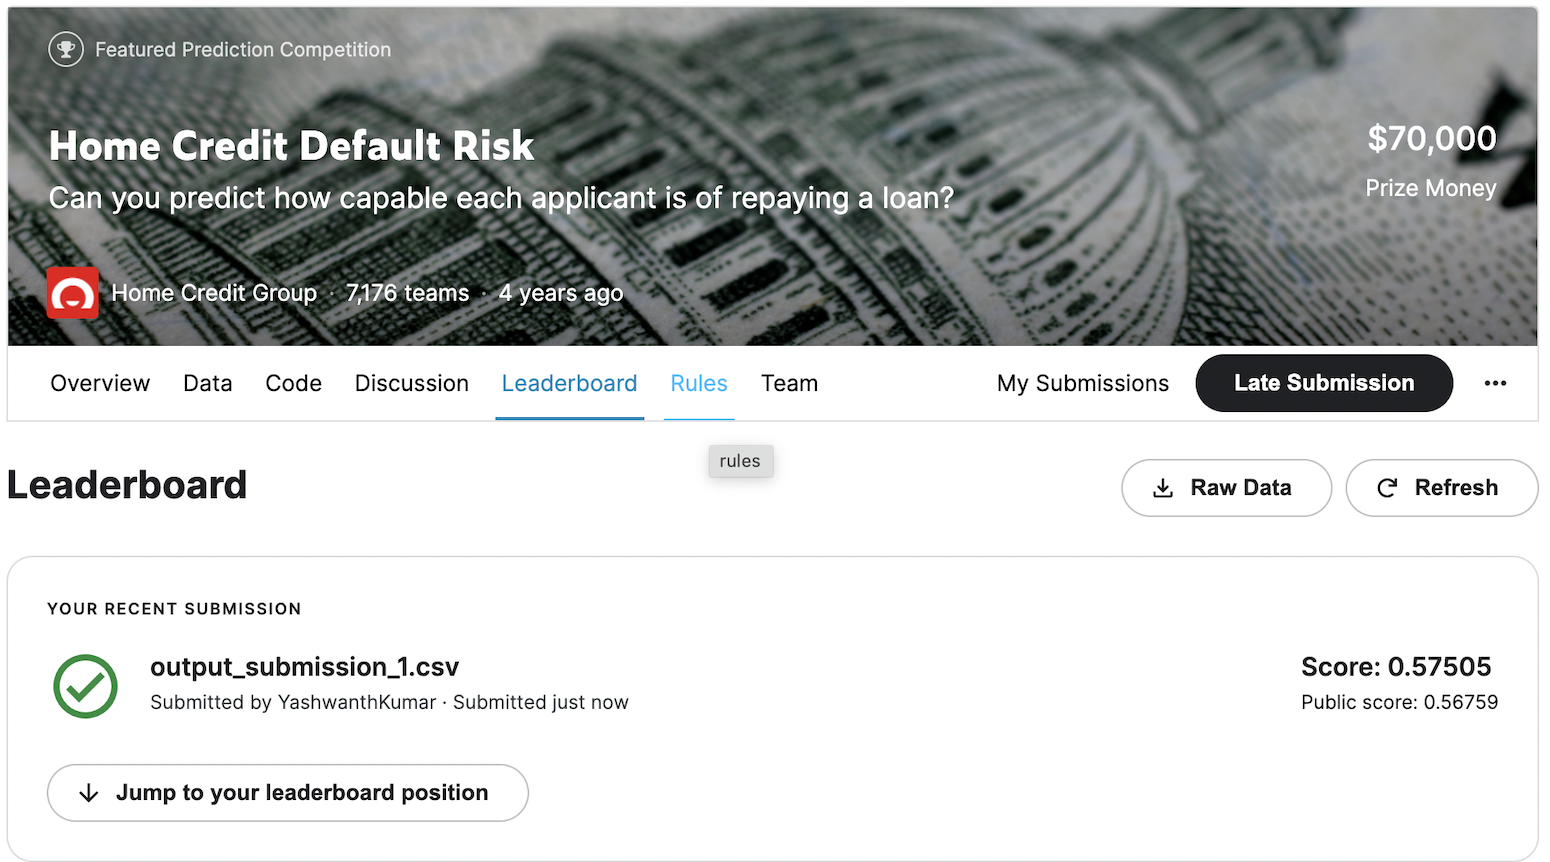